<a href="https://colab.research.google.com/github/macollipal/-challenge3-data-science-LATAM/blob/main/challenge3_data_science_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [27]:
import pandas as pd



# Assuming your CSV file is named 'data.csv' and is in the same directory as the notebook,
# and the separator is ';'. You might need to adjust the file path and separator accordingly.
try:
    data = pd.read_csv('datos_tratados.csv', sep=';')
    data = data.reset_index(drop=True)
    print("✅ Datos cargados:", len(data), "registros")

    display(data.head(5))

except FileNotFoundError:
    print("❌ Error: El archivo 'data.csv' no se encontró.")
except Exception as e:
    print("❌ Ocurrió un error al cargar el archivo:", e)

✅ Datos cargados: 7043 registros


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,account_charges_daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,"65,6","593,3","2,19"
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,"59,9","542,4","2,0"
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,"73,9","280,85","2,46"
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,"98,0","1237,85","3,27"
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,"83,9","267,4","2,8"


#🔧 Transformación

## Eliminar columnas irrelevantes

In [28]:
# Create a copy of the data DataFrame
data_paso = data.copy()

# Drop the customerid column from data_paso
data = data_paso.drop('customerid', axis=1)

print("✅ DataFrame 'data_paso' creado y columna 'customerid' eliminada")
display(data.head())

✅ DataFrame 'data_paso' creado y columna 'customerid' eliminada


,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,account_charges_daily
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,"65,6","593,3","2,19"
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,"59,9","542,4","2,0"
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,"73,9","280,85","2,46"
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,"98,0","1237,85","3,27"
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,"83,9","267,4","2,8"


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   churn                      7043 non-null   int64 
 1   customer_gender            7043 non-null   object
 2   customer_seniorcitizen     7043 non-null   int64 
 3   customer_partner           7043 non-null   int64 
 4   customer_dependents        7043 non-null   int64 
 5   customer_tenure            7043 non-null   int64 
 6   phone_phoneservice         7043 non-null   int64 
 7   phone_multiplelines        7043 non-null   int64 
 8   internet_internetservice   7043 non-null   object
 9   internet_onlinesecurity    7043 non-null   int64 
 10  internet_onlinebackup      7043 non-null   int64 
 11  internet_deviceprotection  7043 non-null   int64 
 12  internet_techsupport       7043 non-null   int64 
 13  internet_streamingtv       7043 non-null   int64 
 14  internet

#### convertir columnas en numericas

In [30]:
import numpy as np

# Convert specified columns to numeric, coercing errors
columns_to_convert = ['account_charges_monthly', 'account_charges_total', 'account_charges_daily']
for col in columns_to_convert:
    data[col] = (
        data[col].astype(str)              # convertir todo a string
        #.str.replace(r'[^0-9.-]', '', regex=True)  # quitar todo lo que no sea número, punto o guion
        .str.replace(',', '.', regex=False)  # cambiar coma por punto
        .replace('', np.nan)               # reemplazar cadenas vacías por NaN
    )
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in the converted columns
#data.dropna(subset=columns_to_convert, inplace=True)

print("✅ Columnas convertidas a numérico y registros inválidos eliminados")


# Replace 'No internet service' with 'No' in relevant columns
internet_cols = ['internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies']
for col in internet_cols:
  data[col] = data[col].replace('No internet service', 'No')

print("✅ No internet service' with 'No' in relevant columns")

✅ Columnas convertidas a numérico y registros inválidos eliminados
✅ No internet service' with 'No' in relevant columns


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7043 non-null   int64  
 1   customer_gender            7043 non-null   object 
 2   customer_seniorcitizen     7043 non-null   int64  
 3   customer_partner           7043 non-null   int64  
 4   customer_dependents        7043 non-null   int64  
 5   customer_tenure            7043 non-null   int64  
 6   phone_phoneservice         7043 non-null   int64  
 7   phone_multiplelines        7043 non-null   int64  
 8   internet_internetservice   7043 non-null   object 
 9   internet_onlinesecurity    7043 non-null   int64  
 10  internet_onlinebackup      7043 non-null   int64  
 11  internet_deviceprotection  7043 non-null   int64  
 12  internet_techsupport       7043 non-null   int64  
 13  internet_streamingtv       7043 non-null   int64

##Encoding

In [32]:
# Select categorical columns to encode
categorical_cols_to_encode = [
    'churn',
    'customer_gender',
    'customer_partner',
    'customer_dependents',
    'phone_phoneservice',
    'phone_multiplelines',
    'internet_internetservice',
    'internet_onlinesecurity',
    'internet_onlinebackup',
    'internet_deviceprotection',
    'internet_techsupport',
    'internet_streamingtv',
    'internet_streamingmovies',
    'account_contract',
    'account_paperlessbilling',
    'account_paymentmethod',
]

# Apply one-hot encoding to the specified columns
data_paso_encoded = pd.get_dummies(data, columns=categorical_cols_to_encode, drop_first=True)

print("✅ Variables categóricas seleccionadas codificadas")
display(data_paso_encoded.head())

✅ Variables categóricas seleccionadas codificadas


,customer_seniorcitizen,customer_tenure,account_charges_monthly,account_charges_total,account_charges_daily,churn_1,customer_gender_Male,customer_partner_1,customer_dependents_1,phone_phoneservice_1,...,internet_deviceprotection_1,internet_techsupport_1,internet_streamingtv_1,internet_streamingmovies_1,account_contract_One year,account_contract_Two year,account_paperlessbilling_1,account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0,9,65.6,593.30,2.19,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,2.00,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.46,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.27,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.80,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [33]:
data_paso_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer_seniorcitizen                         7043 non-null   int64  
 1   customer_tenure                                7043 non-null   int64  
 2   account_charges_monthly                        7043 non-null   float64
 3   account_charges_total                          7032 non-null   float64
 4   account_charges_daily                          7043 non-null   float64
 5   churn_1                                        7043 non-null   bool   
 6   customer_gender_Male                           7043 non-null   bool   
 7   customer_partner_1                             7043 non-null   bool   
 8   customer_dependents_1                          7043 non-null   bool   
 9   phone_phoneservice_1                           7043 

In [34]:
data_paso_encoded.isnull().sum()

,0
customer_seniorcitizen,0
customer_tenure,0
account_charges_monthly,0
account_charges_total,11
account_charges_daily,0
churn_1,0
customer_gender_Male,0
customer_partner_1,0
customer_dependents_1,0
phone_phoneservice_1,0


In [35]:
# Verifica valores nulos en las dos columnas
print(data_paso_encoded[['account_charges_total']].isnull().sum())

account_charges_total    11
dtype: int64


**Tratamiento de valores nulos**

Al identificar valores nulos en las columnas `Total.Day` y `account.Charges.Total`, es necesario decidir entre **eliminar** o **rellenar** esas entradas.

* **Eliminar filas**: como el número de valores nulos es pequeño (11 filas en más de 7 mil), podemos eliminar esas filas sin afectar el análisis. Esto evita introducir distorsiones en los resultados.

* **Reemplazar por cero**: esta opción puede usarse cuando el valor nulo representa ausencia de dato o servicio (por ejemplo, ninguna cobranza), pero puede distorsionar promedios y sumas si no es el caso real.

En este proyecto, optamos por **eliminar las filas con valores nulos** por seguridad y simplicidad, asegurando que los datos usados estén completos.

In [36]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = data_paso_encoded.dropna(subset=['account_charges_total'])

In [37]:
# Select boolean columns
boolean_cols = data_paso_encoded.select_dtypes(include='bool').columns

#Dado que tu objetivo final es entrenar modelos de clasificación, lo más recomendable es usar 0 y 1.
# Convert boolean columns to int64 (True=1, False=0)
data_paso_encoded[boolean_cols] = data_paso_encoded[boolean_cols].astype('int64')

print("✅ Columnas booleanas convertidas a int64")
display(data_paso_encoded.head())

✅ Columnas booleanas convertidas a int64


,customer_seniorcitizen,customer_tenure,account_charges_monthly,account_charges_total,account_charges_daily,churn_1,customer_gender_Male,customer_partner_1,customer_dependents_1,phone_phoneservice_1,...,internet_deviceprotection_1,internet_techsupport_1,internet_streamingtv_1,internet_streamingmovies_1,account_contract_One year,account_contract_Two year,account_paperlessbilling_1,account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0,9,65.6,593.30,2.19,0,0,1,1,1,...,0,1,1,0,1,0,1,0,0,1
1,0,9,59.9,542.40,2.00,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,4,73.9,280.85,2.46,1,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,1,13,98.0,1237.85,3.27,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,0
4,1,3,83.9,267.40,2.80,1,0,1,0,1,...,0,1,1,0,0,0,1,0,0,1


🔄 Normalización de los datos

La normalización es un paso común en el preprocesamiento de datos, especialmente importante para algoritmos que son **sensibles a la escala de los atributos**, como:

* KNN (K-Nearest Neighbors)
* Redes Neuronales
* Regresión Logística
* SVM (Support Vector Machine)

Modelos basados en árboles (como Decision Tree, Random Forest y XGBoost) **no requieren normalización**, ya que no dependen de la escala de los datos para construir sus reglas de decisión.

En este proyecto, aplicaremos la **normalización Min-Max**, que transforma los valores al rango **\[0, 1]**. Esto ayuda a garantizar que todas las variables numéricas contribuyan de forma equilibrada al modelo.

```python
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Mostrando los datos normalizados
dados.head()
```

In [38]:

# Calculate the proportion of churned vs active customers
churn_counts = data_paso_encoded['churn_1'].value_counts(normalize=True)

print("✅ Proporción de clientes que cancelaron (0) vs permanecieron activos (1):")
display(churn_counts)

if churn_counts[0] < 0.3: # Assuming 30% is a reasonable threshold for imbalance
    print("\n⚠️ Existe un desbalance significativo entre las clases.")
else:
    print("\nℹ️ No parece haber un desbalance significativo entre las clases.")

✅ Proporción de clientes que cancelaron (0) vs permanecieron activos (1):


,proportion
churn_1,
0,0.73463
1,0.26537



ℹ️ No parece haber un desbalance significativo entre las clases.


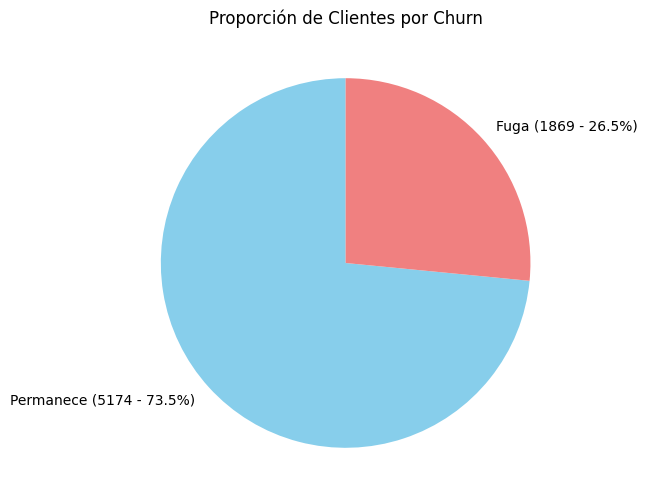

In [39]:
import matplotlib.pyplot as plt

# Mapear valores 1 y 0 a texto en español
label_map = {1: 'Fuga', 0: 'Permanece'}
# Get the counts directly from the value_counts
churn_counts = data_paso_encoded['churn_1'].map(label_map).value_counts()

# Crear etiquetas con porcentaje y cantidad
labels = [
    f'{label} ({count} - {percentage:.1f}%)'
    for label, count, percentage in zip(
        churn_counts.index,
        churn_counts.values,
        churn_counts.values / churn_counts.sum() * 100
    )
]

plt.figure(figsize=(6, 6))
# Create labels with both percentage and count
#labels = [f'{label} ({count} - {percentage:.1f}%)' for label, count, percentage in zip(churn_counts.index, churn_counts.values, churn_counts.values/churn_counts.sum()*100)]


plt.pie(churn_counts, labels=labels, startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Clientes por Churn')
plt.show()

✔️ Normalización/Estandarización

## ≡ Correlación entre las variables

In [40]:
corr = data_paso_encoded.corr()

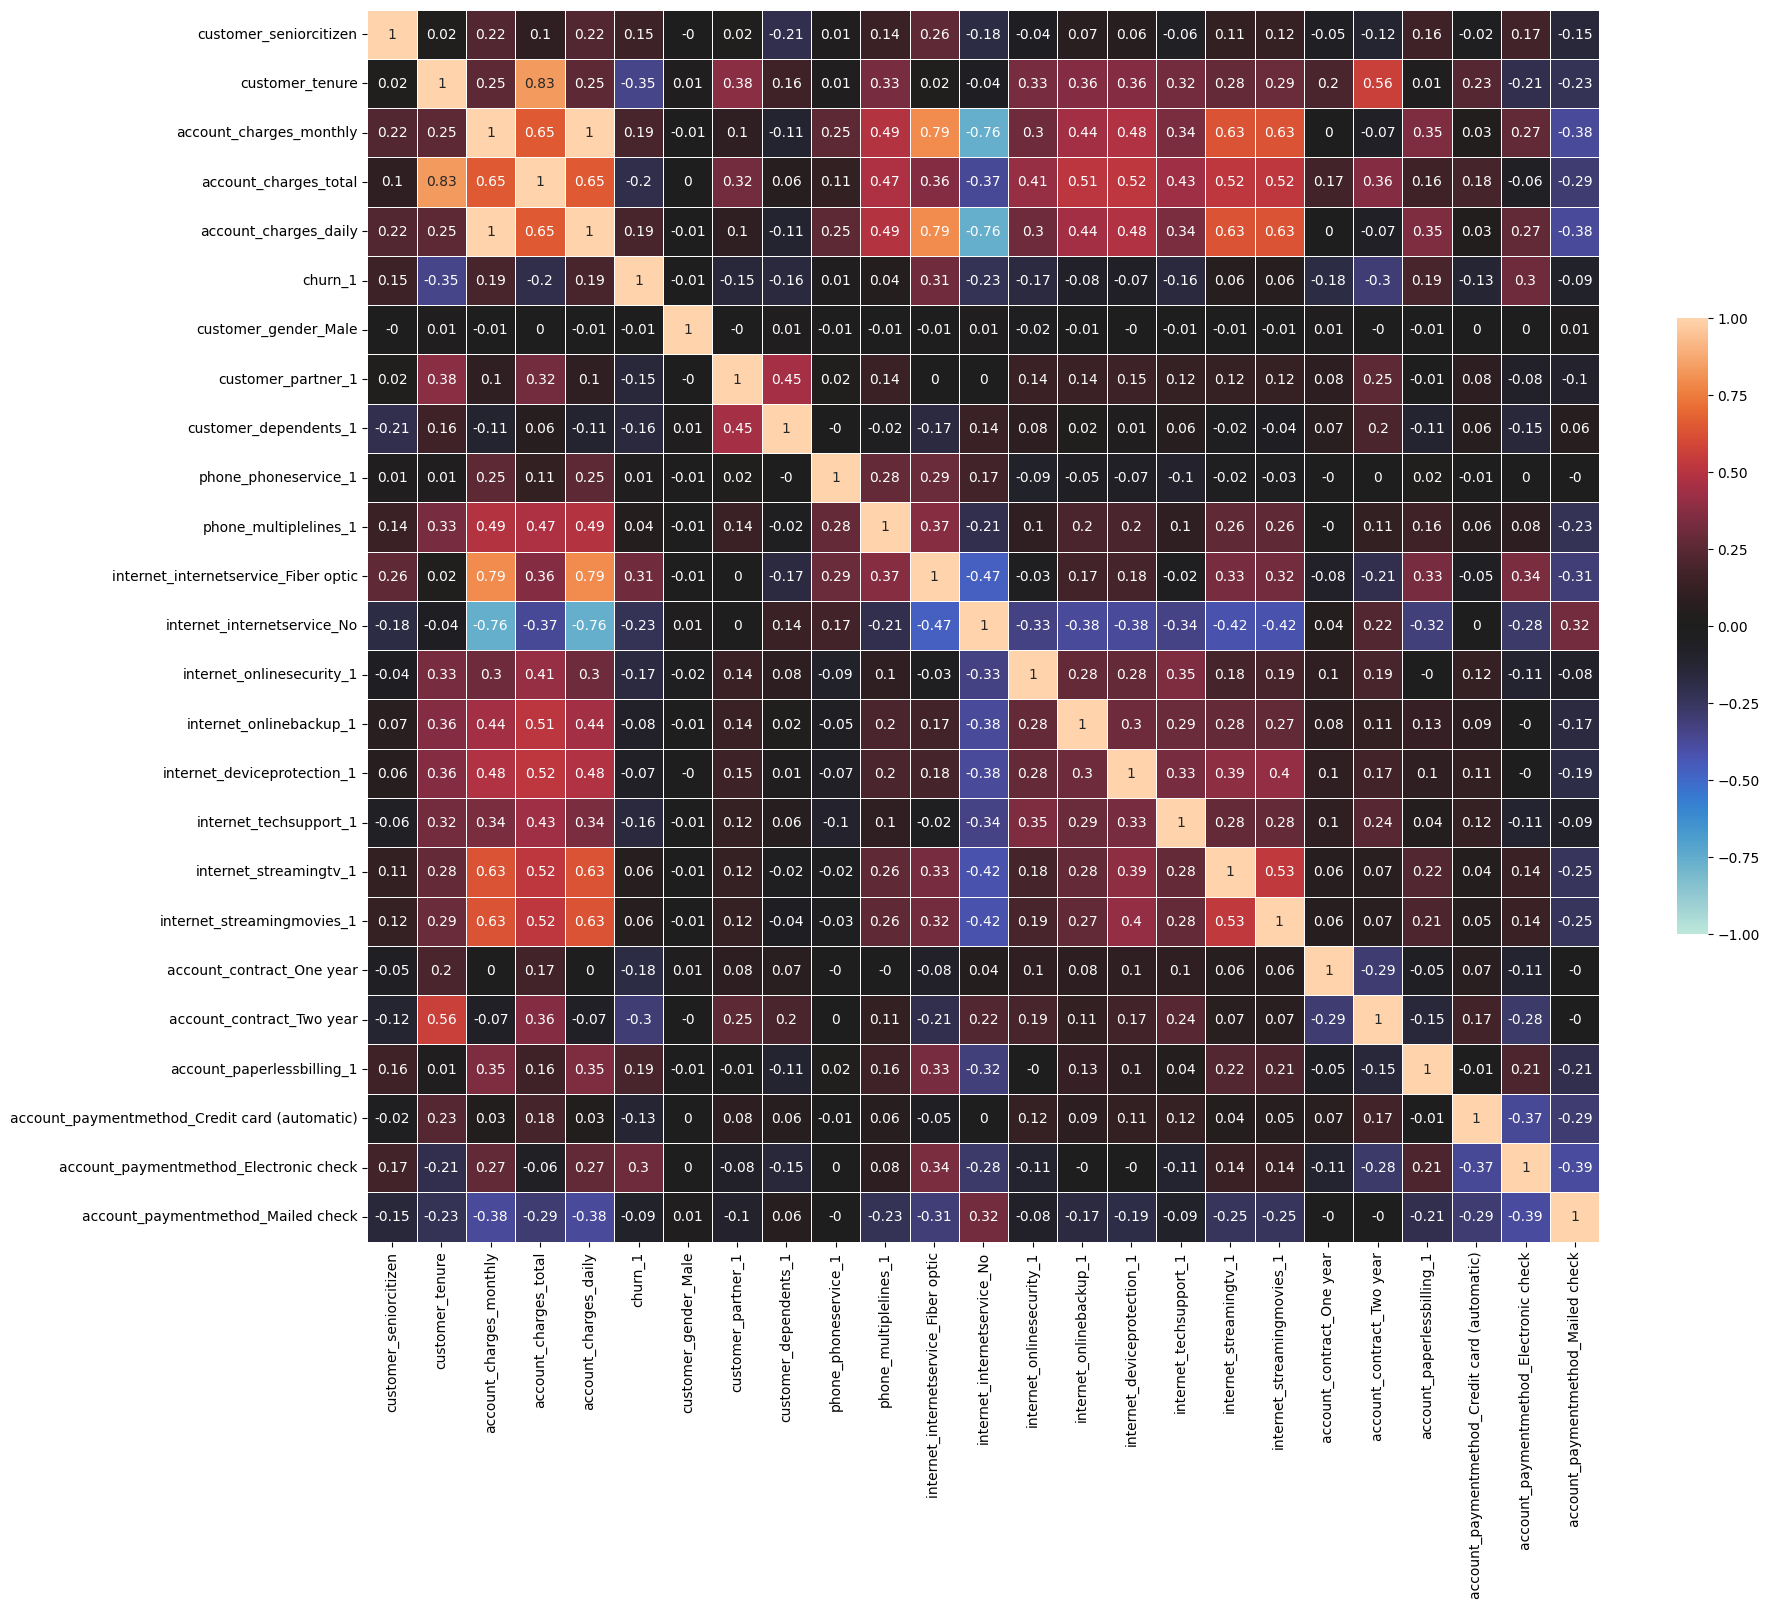

In [41]:
import seaborn as sns
import numpy as np # Import the numpy library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

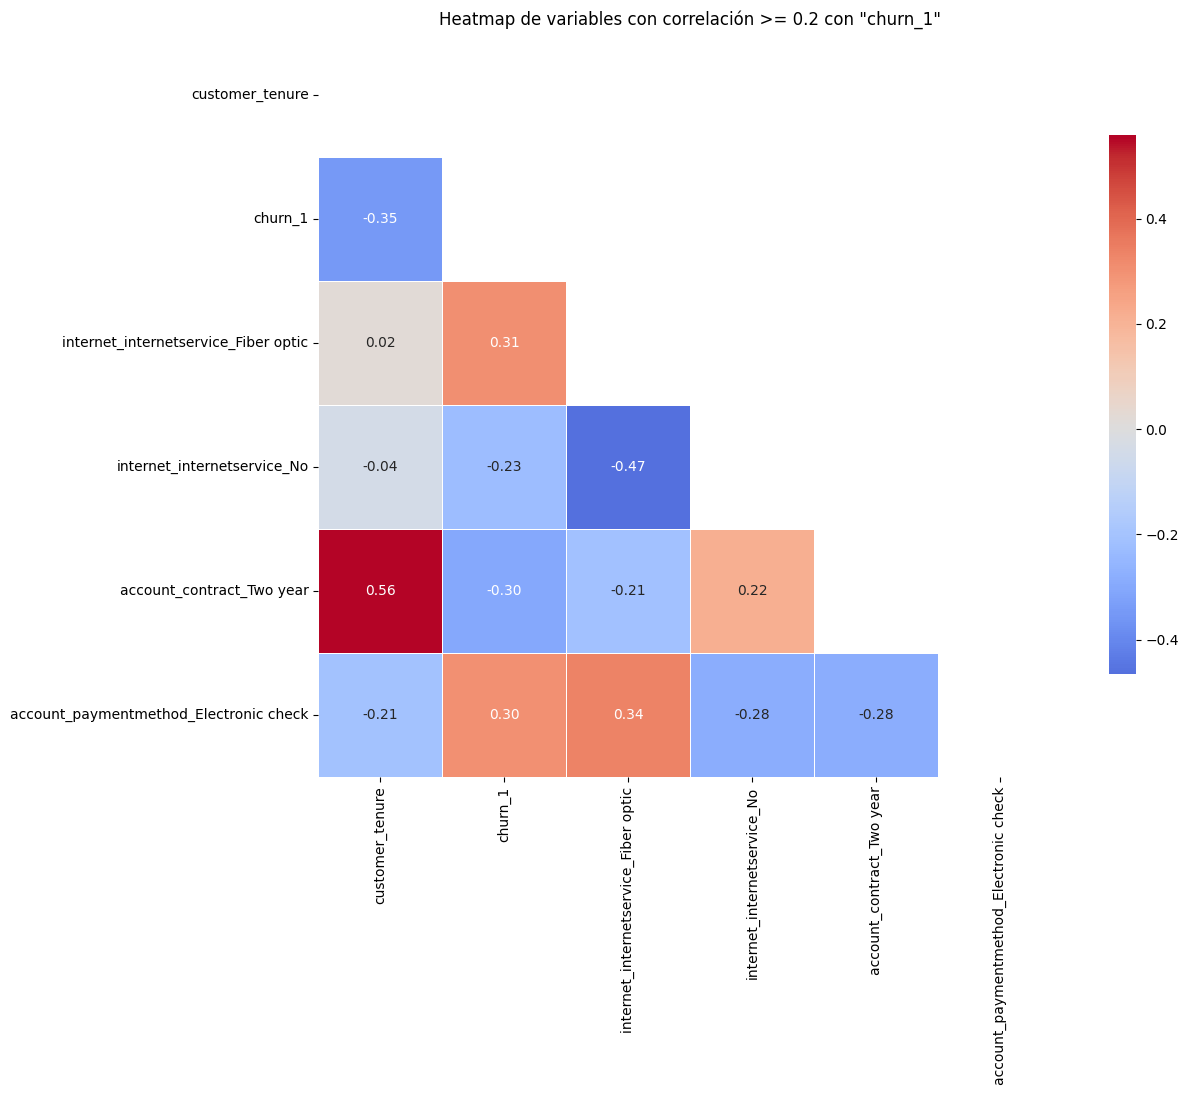

In [42]:
"""python"""
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'churn_1'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

---

✅ **Análisis del nuevo heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.2** (o ≤ -0.2) con la variable objetivo `Churn_Yes(chrun_1)`.

---

🔍 **Correlación con `Churn_Yes` (variable objetivo)**

| Variable                                 | Correlación con Churn\_Yes | Interpretación                                                                                                               |
| ---------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `internet.InternetService_Fiber optic`   | **+0.31**                  | Clientes con fibra óptica tienen **mayor probabilidad de churn**. Puede estar relacionado al costo o a la competitividad.    |
| `account.PaymentMethod_Electronic check` | **+0.30**                  | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado.                    |
| `account.Contract_Two year`              | **-0.30**                  | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios)                                           |
| `customer.tenure`                        | **-0.35**                  | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado                                               |
| `internet.InternetService_No`            | **-0.23**                  | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales) |


In [43]:
"""# Guardar CSV (opcional)
data_paso_encoded.to_csv('datos_a_revisar.csv', index=False, decimal=',',sep=';', mode='w')
#print(f"\n💾 Archivo guardado: datos_normalizados.csv")

# Para descargar en Colab
from google.colab import files
files.download('datos_a_revisar.csv')"""


'# Guardar CSV (opcional)\ndata_paso_encoded.to_csv(\'datos_a_revisar.csv\', index=False, decimal=\',\',sep=\';\', mode=\'w\')\n#print(f"\n💾 Archivo guardado: datos_normalizados.csv")\n\n# Para descargar en Colab\nfrom google.colab import files\nfiles.download(\'datos_a_revisar.csv\')'

# ## 🤖 Modelos Predictivos


### Bibliotecas

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 ### Separar features y target

In [45]:
X = df_encoded.drop(columns=['churn_1'])
y = df_encoded['churn_1']

### Dividir entrenamiento y prueba

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)


**Normalizar**

* Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.

In [48]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

Regresión Logística

In [49]:
#python
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7450236966824645
ROC AUC: 0.8359723502304147
Matriz de Confusión:
 [[570 205]
 [ 64 216]]
              precision    recall  f1-score   support

       False       0.90      0.74      0.81       775
        True       0.51      0.77      0.62       280

    accuracy                           0.75      1055
   macro avg       0.71      0.75      0.71      1055
weighted avg       0.80      0.75      0.76      1055



Random Forest

In [50]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7630331753554502
ROC AUC: 0.8131774193548388
Matriz de Confusión:
 [[643 132]
 [118 162]]
              precision    recall  f1-score   support

       False       0.84      0.83      0.84       775
        True       0.55      0.58      0.56       280

    accuracy                           0.76      1055
   macro avg       0.70      0.70      0.70      1055
weighted avg       0.77      0.76      0.76      1055



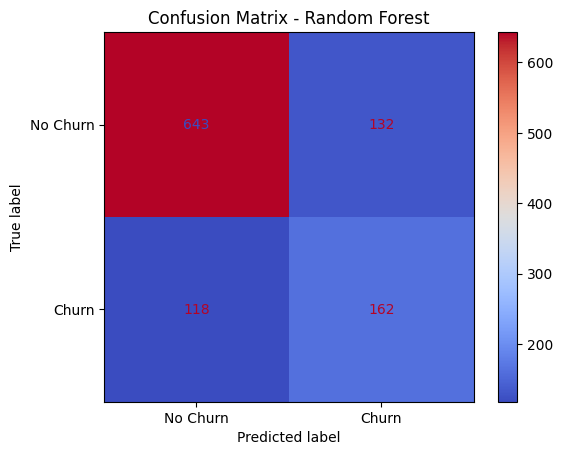

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix - Random Forest')
plt.show()

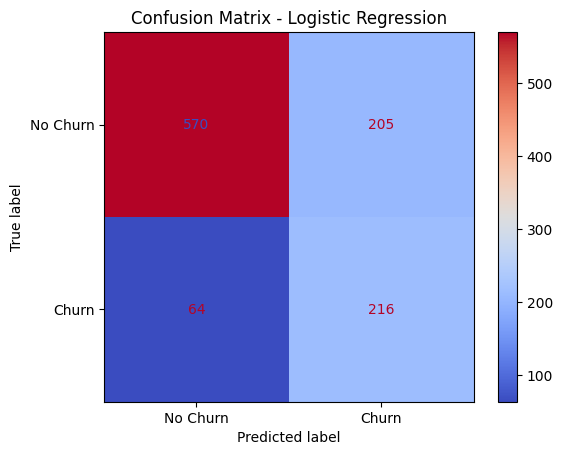

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["No Churn", "Churn"])
disp_lr.plot(cmap="coolwarm")
plt.title('Confusion Matrix - Logistic Regression')
plt.show()